In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize

In [ ]:
data1 = np.loadtxt(os.path.join('DATASET.csv'), delimiter=",")
data1 = pd.DataFrame(data1,columns=['marca','modelo','tipo','puertas','transmicion','combustible','estado','precio'])
data1

,marca,modelo,tipo,puertas,transmicion,combustible,estado,precio
0,5.0,2007.0,3.0,4.0,1.0,1.0,2.0,12000.0
1,4.0,2011.0,2.0,5.0,2.0,1.0,1.0,25000.0
2,8.0,2010.0,1.0,5.0,2.0,1.0,2.0,24800.0
3,19.0,2013.0,3.0,5.0,2.0,1.0,2.0,10200.0
4,2.0,2010.0,3.0,5.0,2.0,1.0,2.0,16900.0
...,...,...,...,...,...,...,...,...
1112,2.0,2010.0,2.0,5.0,2.0,1.0,2.0,31000.0
1113,2.0,2021.0,3.0,4.0,2.0,2.0,2.0,41000.0
1114,2.0,2008.0,3.0,4.0,2.0,1.0,2.0,12000.0
1115,10.0,2017.0,2.0,4.0,2.0,1.0,2.0,23000.0


In [ ]:
data1 = data1.to_numpy()

In [ ]:
def  featureNormalize(x):
    x_norm = x.copy()
    mu = np.zeros(x.shape[1])
    sigma = np.zeros(x.shape[1])

    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x_norm = (x - mu) / sigma
    
    return x_norm

In [ ]:
x_original =data1[:1116,:7]
print(x_original[0])
array_norm = featureNormalize(data1[:1116,:])
y=array_norm[:,7]
x = featureNormalize(x_original)
x_original = np.c_[np.ones(len(x)), x_original]
x = np.c_[np.ones(len(x)), x]
print(x[0])
print(y)

[5.000e+00 2.007e+03 3.000e+00 4.000e+00 1.000e+00 1.000e+00 2.000e+00]
[ 1.         -0.88803396 -0.05667979  1.31263702 -0.35180597 -0.88312191
 -0.25009644  0.41059273]
[-0.07325104 -0.03482719 -0.03541832 ...  0.01246372 -0.07325104
 -0.04073855]


In [ ]:
def computeCostMulti(x, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(x, theta)
    J = (1/(2 * m)) * np.sum(np.power((h - y),2))    
    return J

In [ ]:
def gradientDescentMulti(x, y, theta, alpha, num_iters):   
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * np.sum((np.dot(x, theta) - y).dot(x))
        J_history.append(computeCostMulti(x, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.02369065 -0.02369065 -0.02369065 -0.02369065 -0.02369065 -0.02369065
 -0.02369065 -0.02369065]


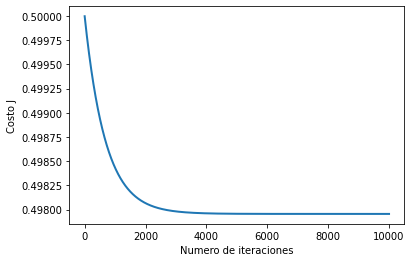

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(x, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
J_history[-1]

0.49795457426398254

In [ ]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [ ]:
y_original = data1[:1116,7]
thetaNormal = normalEqn(x_original,y_original)
print(thetaNormal)

[ 1.32314210e+05 -2.18554605e+03  8.48178719e+01  3.04968025e+03
 -3.66692447e+03 -3.28158274e+04 -1.70993369e+04 -8.85673425e+04]


In [ ]:
X_array = [1, 19.0,	2018.0,	3.0,	4.0,	1.0,	2.0,	2.0]
price = np.dot(X_array, thetaNormal)
print('El precio predecido para este auto (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para este auto (usando el descenso por el gradiente): $12283
